In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import scipy.stats
import seaborn as sns
from glob import glob
from zimp.pos.statistics_analyzer import TextLengthAnalyzer

plt.style.use('seaborn-whitegrid')

In [2]:
def get_ds_language(ds):
    if ds in ['10K-GNAD', 'GERMEVAL-2018', 'GERMEVAL-2020']:
        return 'de'
    return 'en'


source_dir = '../../zimp_orchestrator/orch/resources'
rs = []
df_confs = {}
for file in glob('confidence/confidence*.csv'):
    dataset =  file.split('_')[-2]
    train_test = file.split('_')[-1].split('.')[0]
    source_file = os.path.join(source_dir, dataset, train_test + '.csv')
    df_conf = pd.read_csv(file)
    df_text = pd.read_csv(source_file)
    df_conf['txt_len'] = TextLengthAnalyzer(df_text.text).extract_batch_metrics() 
    df_confs['_'.join(file.split('_')[1:])[:-4]] = df_conf
    rs.append({
        'pearson_p_true': scipy.stats.pearsonr(df_conf['p_true'], df_conf['txt_len'])[0],
        'spearman_p_true': scipy.stats.spearmanr(df_conf['p_true'], df_conf['txt_len'])[0],
        'pearson_conf': scipy.stats.pearsonr(df_conf['mean'], df_conf['txt_len'])[0],
        'spearman_conf': scipy.stats.spearmanr(df_conf['mean'], df_conf['txt_len'])[0],
        'model': '_'.join(file.split('_')[1:-2]),
        'dataset': dataset,
        'train_test': train_test,
        'language': get_ds_language(file.split('_')[-2])
    }) 
    
df_corr = pd.DataFrame(rs)
df_corr

,pearson_p_true,spearman_p_true,pearson_conf,spearman_conf,model,dataset,train_test,language
0,-0.039839,-0.041057,-0.077948,-0.125931,BERT,DBP-14,test,en
1,-0.032785,-0.035783,-0.070195,-0.128384,BERT,DBP-14,train,en
2,-0.090548,-0.123349,-0.009576,0.041444,BERT,TREC-6,test,en
3,-0.000492,-0.007793,0.044731,0.039716,BERT,TREC-6,train,en
4,-0.014690,-0.016354,-0.135350,-0.181017,BERT,YELP-5,test,en
5,-0.092479,-0.091541,-0.181080,-0.229183,BERT,YELP-5,train,en
6,-0.003857,-0.012109,0.059765,0.069319,DECISION_TREE,10K-GNAD,test,de
7,0.005304,0.015735,0.057732,0.083708,DECISION_TREE,10K-GNAD,train,de
8,-0.040748,-0.041675,0.009731,-0.018553,DECISION_TREE,DBP-14,test,en
9,-0.054387,-0.056388,0.000760,-0.024894,DECISION_TREE,DBP-14,train,en


In [3]:
df_corr[['pearson_p_true', 'spearman_p_true', 'pearson_conf', 'spearman_conf']].mean()

pearson_p_true    -0.014837
spearman_p_true   -0.016791
pearson_conf      -0.021321
spearman_conf     -0.072265
dtype: float64

In [4]:
df_model_corr = df_corr.groupby(['model'])[['pearson_p_true', 'spearman_p_true', 'pearson_conf', 'spearman_conf']].mean()
df_model_corr

,pearson_p_true,spearman_p_true,pearson_conf,spearman_conf
model,,,,
BERT,-0.045139,-0.052646,-0.071570,-0.097226
DECISION_TREE,-0.030637,-0.037887,0.001621,-0.000315
FASTTEXT,-0.059919,-0.066643,-0.220553,-0.313051
GERMAN_BERT,0.013670,0.022932,0.055236,0.055714
RANDOM_FOREST,0.032669,0.030337,0.212954,0.114680
SVM,-0.000564,0.005097,-0.092462,-0.141884


In [5]:
def get_latex_method_name(model_type):
    if model_type == 'GERMAN_BERT':
        return 'GER\_BERT'
    elif model_type == 'DECISION_TREE':
        return 'DT'
    elif model_type == 'RANDOM_FOREST':
        return 'RF'
    elif model_type == 'FASTTEXT':
        return 'FT'
    elif model_type == 'DUMMY':
        return 'BASE'
    return model_type.replace('_', '\_')

def get_latex_metric(metric_str, max_abs_score, method):
    is_max = np.abs(metric_str) == max_abs_score
    
    metric_str = np.round(metric_str,2)
    if is_max:
        return '\mathbf{' + str(metric_str) + '}'
    return metric_str

In [6]:
reported_methods = ['DUMMY', 'DECISION_TREE', 'RANDOM_FOREST', 'SVM', 'FASTTEXT', 'BERT', 'GERMAN_BERT']
print("""
\\begin{table}[]
    \small
    \centering
    \\begin{tabular}{l|cc|cc}
        Method & $r$ & $\\rho$ & $r'$ & $\\rho'$ \\\\ \hline
""")

for method in reported_methods:
    if method not in df_model_corr.index:
        continue
    s = ' ' * 8
    s += '\\textit{' + get_latex_method_name(method) + '} & '
    s += ' & '.join([f'${get_latex_metric(df_model_corr.loc[method, metric], df_model_corr.abs().max()[metric], method)}$' for metric in df_model_corr.columns])
    s +=  ' \\\\'
    print(s)

print("""
    \end{tabular}
    \caption[Correlation between text length and classification metrics]{Pearson and Spearman correlation coefficients for text length and the ratio of correct model instances $(r, \\rho)$, and the average prediction confidence $(r', \\rho')$}
    \label{tab:corr_length}
\end{table}
""")


\begin{table}[]
    \small
    \centering
    \begin{tabular}{l|cc|cc}
        Method & $r$ & $\rho$ & $r'$ & $\rho'$ \\ \hline

        \textit{DT} & $-0.03$ & $-0.04$ & $0.0$ & $-0.0$ \\
        \textit{RF} & $0.03$ & $0.03$ & $0.21$ & $0.11$ \\
        \textit{SVM} & $-0.0$ & $0.01$ & $-0.09$ & $-0.14$ \\
        \textit{FT} & $\mathbf{-0.06}$ & $\mathbf{-0.07}$ & $\mathbf{-0.22}$ & $\mathbf{-0.31}$ \\
        \textit{BERT} & $-0.05$ & $-0.05$ & $-0.07$ & $-0.1$ \\
        \textit{GER\_BERT} & $0.01$ & $0.02$ & $0.06$ & $0.06$ \\

    \end{tabular}
    \caption[Correlation between text length and classification metrics]{Pearson and Spearman correlation coefficients for text length and the ratio of correct model instances $(r, \rho)$, and the average prediction confidence $(r', \rho')$}
    \label{tab:corr_length}
\end{table}



In [7]:
df_corr.groupby(['dataset'])[['pearson_p_true', 'spearman_p_true', 'pearson_conf', 'spearman_conf']].mean()

,pearson_p_true,spearman_p_true,pearson_conf,spearman_conf
dataset,,,,
10K-GNAD,-0.009844,-0.006816,-0.077312,-0.104206
DBP-14,-0.037415,-0.040623,-0.040556,-0.136615
GERMEVAL-2018,0.008957,0.008010,-0.014720,-0.094879
GERMEVAL-2020,0.033001,0.043623,0.120022,0.137922
TREC-6,-0.076322,-0.109832,-0.148488,-0.146598
YELP-5,-0.007398,0.004894,0.033127,-0.089214


<AxesSubplot:xlabel='txt_len', ylabel='mean'>

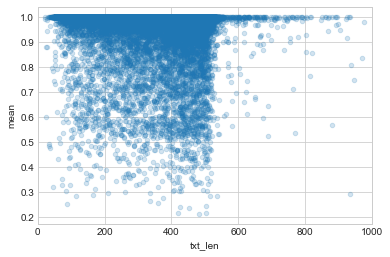

In [8]:
df_confs['FASTTEXT_DBP-14_test'].plot(x='txt_len', y='mean', kind='scatter', alpha=.2, xlim=(0,1000))

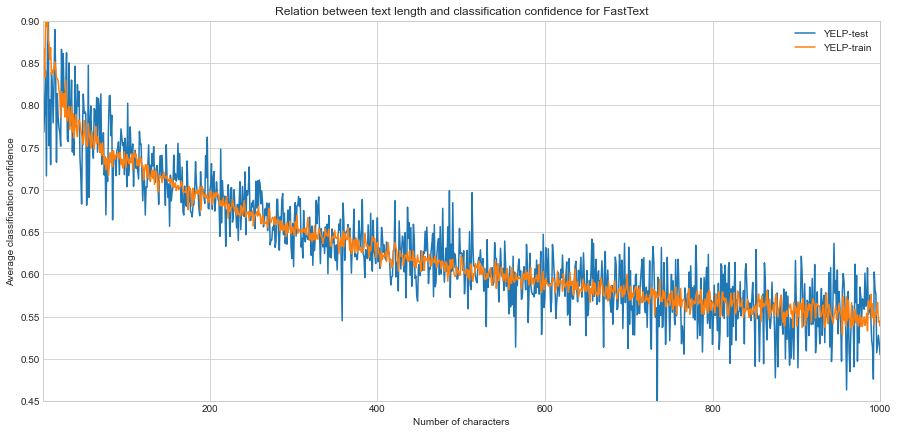

In [9]:
fig = plt.figure(figsize=(15,7))
ax = fig.add_subplot(1, 1, 1)

ds_keys = [ds for ds in df_confs if 'FASTTEXT_YELP' in ds]
for ds in ds_keys:
    df_confs[ds].groupby(['txt_len'])['mean'].mean().plot(ax=ax, xlim=(1,1000), ylim=(0.45,0.9))
    
plt.title('Relation between text length and classification confidence for FastText')
plt.xlabel('Number of characters')
plt.ylabel('Average classification confidence')
ax.legend(['YELP-test', 'YELP-train'])
plt.savefig(f'confidence/009_corr_textlen_yelp.pdf')
plt.show()

In [10]:
df_confs['FASTTEXT_DBP-14_test'].groupby(['txt_len'])['mean'].mean().plot(ax=ax)

<AxesSubplot:title={'center':'Relation between text length and classification confidence for FastText'}, xlabel='txt_len', ylabel='Average classification confidence'>